In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6.180)})
sns.set_style("whitegrid")

In [2]:
%matplotlib inline

In [126]:
code = pd.read_csv("/Users/weilu/Dropbox/WorldBankData/averageGDP/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10224851.csv").dropna(axis=1, how="all")

In [132]:
exclude = code.query("Region != Region")
exclude

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World
34,CEB,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics
47,CSS,NaN,NaN,NaN,Caribbean small states
59,EAP,NaN,NaN,East Asia and Pacific regional aggregate (does...,East Asia & Pacific (excluding high income)
60,EAR,NaN,NaN,Early-dividend countries are mostly lower-midd...,Early-demographic dividend
61,EAS,NaN,NaN,East Asia and Pacific regional aggregate (incl...,East Asia & Pacific
62,ECA,NaN,NaN,Europe and Central Asia regional aggregate (do...,Europe & Central Asia (excluding high income)
63,ECS,NaN,NaN,Europe and Central Asia regional aggregate (in...,Europe & Central Asia
66,EMU,NaN,NaN,Euro area aggregate.,Euro area
71,EUU,NaN,NaN,European Union aggregate.,European Union


In [136]:
"WLD" in exclude["Country Code"].values

True

In [109]:
averageGDP = pd.read_csv("/Users/weilu/Dropbox/WorldBankData/averageGDP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10224851.csv", skiprows=4)

averageGDP = averageGDP.dropna(axis=1, how="all")
averageGDP.columns = averageGDP.columns.str.replace(" ", "_")



In [112]:
t = (averageGDP.dropna(axis=1, how="all")[[str(i) for i in range(1960, 2018)]].values > 0).sum(axis=0)

/Users/weilu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


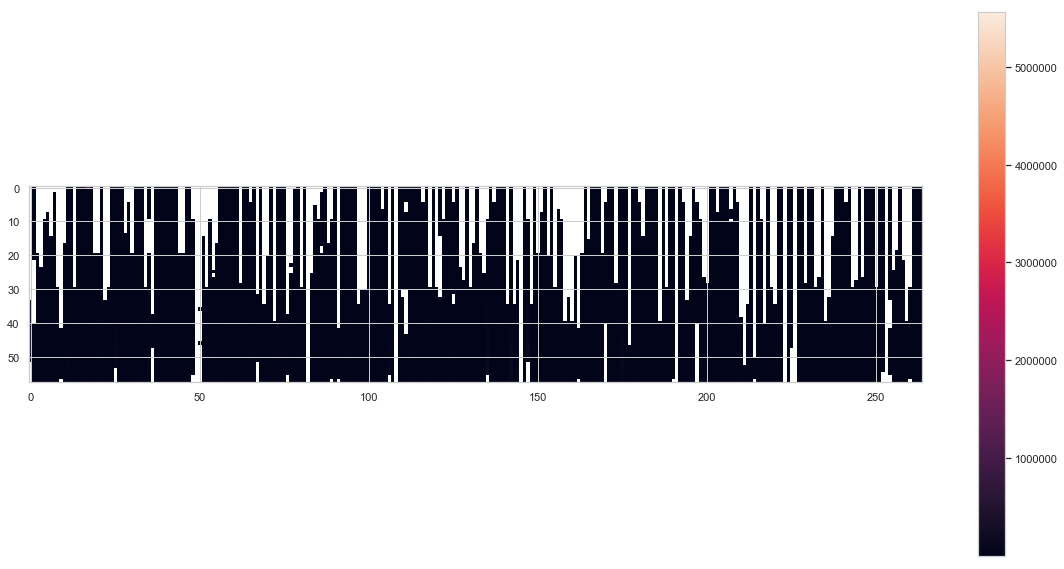

In [114]:
m = averageGDP.dropna(axis=1, how="all")[[str(i) for i in range(1960, 2018)]]
plt.figure(figsize=(20,10))
plt.imshow(m.T)
plt.colorbar()

In [115]:
population = pd.read_csv("/Users/weilu/Dropbox/WorldBankData/Population/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=4).dropna(axis=1, how="all")
population.columns = population.columns.str.replace(" ", "_")


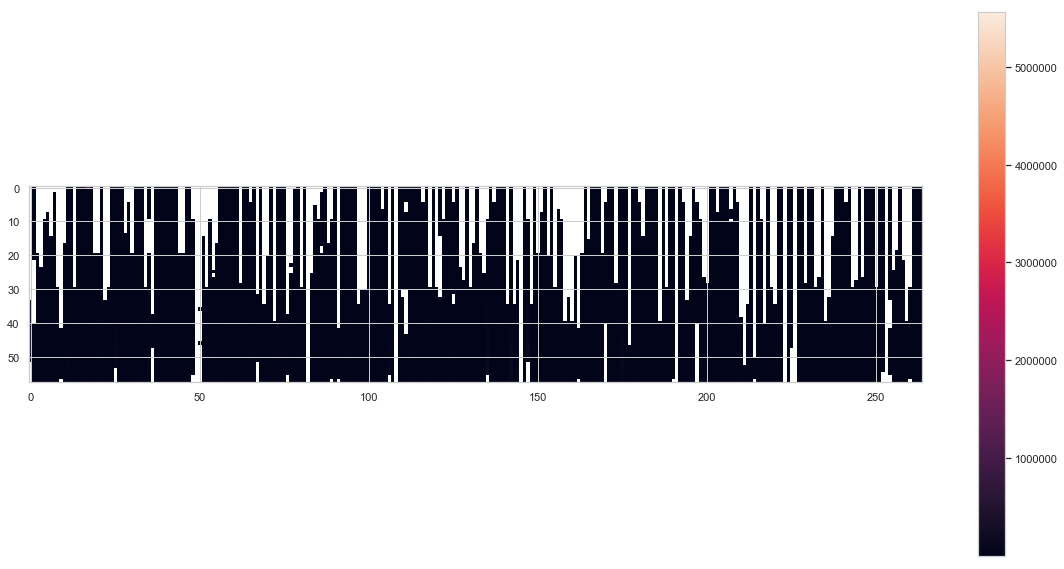

In [116]:
m = averageGDP.dropna(axis=1, how="all")[[str(i) for i in range(1960, 2018)]]
plt.figure(figsize=(20,10))
plt.imshow(m.T)
plt.colorbar()

In [117]:
len(averageGDP)

264

In [118]:
len(population)

264

In [119]:
china

59659.887694344005

In [172]:
higher_than_china_pop = 0
for year in range(2017, 2018):
    china = averageGDP.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_china = population.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_below_china = 0.0
    total_p_this_year = 0.0
    for i in range(len(averageGDP)):
        c = averageGDP.iloc[i]
#         print(i, c)
        country = c["Country_Name"]
        this_country_code = c["Country_Code"]
        gdp_per_capita = averageGDP.iloc[i][str(year)]
        p = population.query(f'Country_Name == "{country}"')
        pop = p[str(year)].values[0]
        if this_country_code in exclude["Country Code"].values:
            pass
        elif np.isnan(gdp_per_capita):
#             print("gdp_per_capita Nan")
            pass
        elif np.isnan(pop):
#             print("population Nan")
            pass
        else:
            if gdp_per_capita < china:
                p_below_china += pop
            else:
                if pop > 1e7: # 1 millions in population
                    print(country, gdp_per_capita, pop/1e6)
            if gdp_per_capita > china and gdp_per_capita > 10814:
#                 print(country)
                higher_than_china_pop += pop
            total_p_this_year += pop 
#         if not np.isnan(pop):
#             total_p_this_year += pop 
#         else:
#             print("Hi", country)
    #     print(country, gdp_per_capita, pop)
    below_percent = p_below_china/total_p_this_year
    include_china = (p_below_china + p_china)/total_p_this_year
    tmp = [year, below_percent, include_china, total_p_this_year, china]
    print(tmp)
print(higher_than_china_pop/1e6)

Argentina 14401.974854608101 44.271041
Australia 53799.938089959905 24.598933
Belgium 43323.8073364711 11.372068
Brazil 9821.407686410079 209.288278
Canada 45032.1199081697 36.708083
Chile 15346.4496997595 18.054726
China 8826.99409574835 1386.395
Czech Republic 20368.1385576071 10.591323
Germany 44469.90906072441 82.695
Spain 28156.8158362352 46.572028
France 38476.6586361575 67.118648
United Kingdom 39720.4434267836 66.022273
Greece 18613.4238733817 10.760421
Italy 31952.9759206841 60.551416
Japan 38428.0973168279 126.785797
Kazakhstan 8837.45730230661 18.037646
Korea, Rep. 29742.8388613471 51.466201
Mexico 8902.83082294794 129.163276
Malaysia 9944.904300185759 31.624264
Netherlands 48223.1554941825 17.132854
Poland 13811.664243680802 37.975841
Portugal 21136.2972102005 10.293718
Romania 10813.7166001986 19.586539
Russian Federation 10743.0965915463 144.495044
Saudi Arabia 20760.9060117662 32.938213
Sweden 53442.0082808022 10.067744
Turkey 10540.617998709 80.74502
United States 59531

In [166]:
data = []
higher_than_china_pop = 0.0
for year in range(2017, 2018):
    china = averageGDP.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_china = population.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_below_china = 0.0
    total_p_this_year = 0.0
    for i in range(len(averageGDP)):
        c = averageGDP.iloc[i]
#         print(i, c)
        country = c["Country_Name"]
        this_country_code = c["Country_Code"]
        gdp_per_capita = averageGDP.iloc[i][str(year)]
        p = population.query(f'Country_Name == "{country}"')
        pop = p[str(year)].values[0]
        if this_country_code in exclude["Country Code"].values:
            pass
        elif np.isnan(gdp_per_capita):
#             print("gdp_per_capita Nan")
            pass
        elif np.isnan(pop):
#             print("population Nan")
            pass
        else:
            if gdp_per_capita < china:
                p_below_china += pop
            else:
                if pop > 1e7: # 1 millions in population
                    print(country, gdp_per_capita, pop/1e6)
                    higher_than_china_pop += pop
            if gdp_per_capita > china:
                print(country)
            total_p_this_year += pop 
#         if not np.isnan(pop):
#             total_p_this_year += pop 
#         else:
#             print("Hi", country)
    #     print(country, gdp_per_capita, pop)
    below_percent = p_below_china/total_p_this_year
    include_china = (p_below_china + p_china)/total_p_this_year
    tmp = [year, below_percent, include_china, total_p_this_year]
    data.append(tmp)
    print(tmp)
print(higher_than_china_pop/1e6)

Andorra
United Arab Emirates
Argentina 14401.974854608101 44.271041
Argentina
Antigua and Barbuda
Australia 53799.938089959905 24.598933
Australia
Austria
Belgium 43323.8073364711 11.372068
Belgium
Bahrain
Bahamas, The
Brazil 9821.407686410079 209.288278
Brazil
Barbados
Brunei Darussalam
Canada 45032.1199081697 36.708083
Canada
Switzerland
Chile 15346.4496997595 18.054726
Chile
China 8826.99409574835 1386.395
Costa Rica
Cyprus
Czech Republic 20368.1385576071 10.591323
Czech Republic
Germany 44469.90906072441 82.695
Germany
Denmark
Spain 28156.8158362352 46.572028
Spain
Estonia
Finland
France 38476.6586361575 67.118648
France
United Kingdom 39720.4434267836 66.022273
United Kingdom
Equatorial Guinea
Greece 18613.4238733817 10.760421
Greece
Grenada
Hong Kong SAR, China
Croatia
Hungary
Ireland
Iceland
Israel
Italy 31952.9759206841 60.551416
Italy
Japan 38428.0973168279 126.785797
Japan
Kazakhstan 8837.45730230661 18.037646
Kazakhstan
St. Kitts and Nevis
Korea, Rep. 29742.8388613471 51.466

In [141]:
data = []
for year in range(1960, 2018):
    china = averageGDP.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_china = population.query(f"Country_Name == 'China'")[str(year)].values[0]
    p_below_china = 0.0
    total_p_this_year = 0.0
    for i in range(len(averageGDP)):
        c = averageGDP.iloc[i]
#         print(i, c)
        country = c["Country_Name"]
        this_country_code = c["Country_Code"]
        gdp_per_capita = averageGDP.iloc[i][str(year)]
        p = population.query(f'Country_Name == "{country}"')
        pop = p[str(year)].values[0]
        if this_country_code in exclude["Country Code"].values:
            pass
        elif np.isnan(gdp_per_capita):
#             print("gdp_per_capita Nan")
            pass
        elif np.isnan(pop):
#             print("population Nan")
            pass
        else:
            if gdp_per_capita < china:
                p_below_china += pop
            total_p_this_year += pop 
#         if not np.isnan(pop):
#             total_p_this_year += pop 
#         else:
#             print("Hi", country)
    #     print(country, gdp_per_capita, pop)
    below_percent = p_below_china/total_p_this_year
    include_china = (p_below_china + p_china)/total_p_this_year
    tmp = [year, below_percent, include_china, total_p_this_year, china]
    data.append(tmp)
    print(tmp)
data = np.array(data)

[1960, 0.24938035057899183, 0.5358748022055203, 2328387151.0, 89.52054151035841]
[1961, 0.0179179114868462, 0.2980966865142763, 2356816643.0, 75.8058379259965]
[1962, 0.014679121828633852, 0.289965719295237, 2418461364.0, 70.90941166710071]
[1963, 0.010824993775869724, 0.2869949724180933, 2470706640.0, 74.3136434486145]
[1964, 0.016724221594707808, 0.29350229488756685, 2523158687.0, 85.4985551596313]
[1965, 0.011347243546853614, 0.28516617403118016, 2611890269.0, 98.48677775222059]
[1966, 0.20160112086978632, 0.47696388522275335, 2670658837.0, 104.324566181147]
[1967, 0.23285661731946677, 0.4985078683798731, 2840378116.0, 96.5895319417819]
[1968, 0.049295281604295776, 0.3148444553403496, 2916634946.0, 91.4727183066072]
[1969, 0.049445233935341094, 0.31632654815563016, 2982692896.0, 100.12990326618]
[1970, 0.22809886061085063, 0.48938847006963726, 3131831387.0, 113.16299155468599]
[1971, 0.2270301684936131, 0.4897358070553263, 3201701359.0, 118.65457778534599]
[1972, 0.24964394138287124

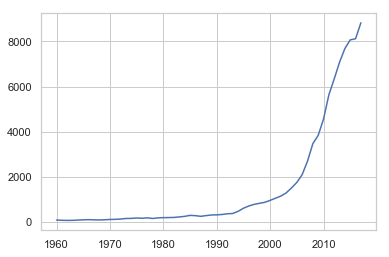

In [144]:
plt.plot(data[:,0], data[:,4])

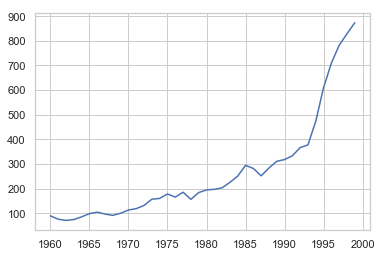

In [148]:
n = 40
plt.plot(data[:,0][:n], data[:,4][:n])

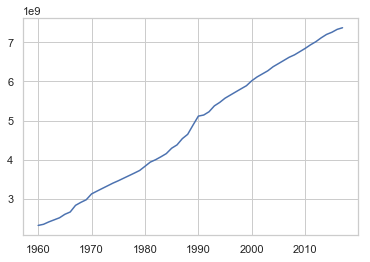

In [140]:
plt.plot(data[:,0], data[:,3])

(0, 1)

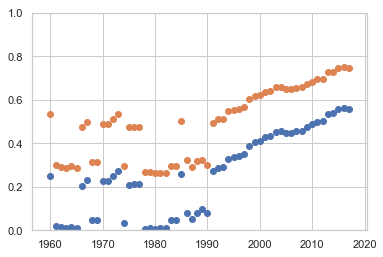

In [145]:
data = np.array(data)
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], data[:,2])
plt.ylim([0,1])

(0, 1)

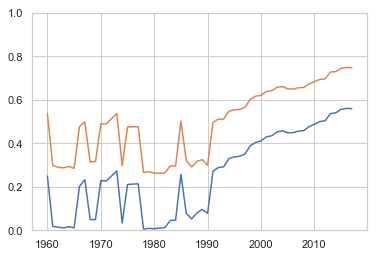

In [146]:
data = np.array(data)
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.ylim([0,1])